# Técnicas de Amostragem
<h3> Ojetivo:</h3>
Este relatório tem como objetivo, a análise de dados sobre a taxa de homicídio no estado do Pará, possuindo divisões de mesoregiões e municípios do estado. Além disso, realizar comparações de três técnicas de amostragens mais comuns, sendo elas:
<ul>
    <li><b>Amostragem Aleatória Simples (AAS)</b></li>
    <li><b>Amostragem Sistemática (AS)</b></li>
    <li><b>Amostragem Estratificada (AE)</b></li>
</ul>
Sendo assim, realizado a análise utilizando os três tipos de técnicas, e comparando entre elas, qual tem maior representatividade com relação aos dados da população.
<br>
<h3>Métodos:</h3>
Para realização da análise foi utilizado as três técnicas mais comuns de amostragem, uma base de dados com informações sobre a taxa de mortalidade de 144 muncípios do estado do Pará no ano de 2019(FAPESPA), para fazer o processamento e extração de informação dos dados, foi utilizado a linguagem de programação Python incluindo algumas bibliotecas/módulos para realizar o processamento, sendo:
<ul>
    <li><b>csv:</b> utilizada para fazer leitura de arquivos csv</li>    
    <li><b>math:</b> biblioteca para utilização de algumas funções matemáticas</li>    
    <li><b>matplotlib:</b> biblioteca com uma variedade extensa de opções para plotar gráficos</li>
    <li><b>functools(função reduce):</b> módulo utilizado para aplicar operações em itens de listas</li>
    <li><b>random:</b> utilizada para fazer a seleção de forma aleatória dos dados</li>
</ul>

Além de bibliotecas da linguagem, foi utilizado o `Jupyter Notebook`, ferramenta muito utilizada na área de ciência de dados.


In [1]:
#importação das bibliotecas/móduos a serem utilizados
import csv
import math
import matplotlib.pyplot as plt
from functools import reduce
import random


# Resultados:
O primeiro arquivo de dados utilizado foi o `dados2.csv`, contendo respectivamente as variáveis município, taxa de homicídio e mesoregião pertencente.

In [2]:
with open('dados2.csv', 'r') as dados:
    leitura = csv.reader(dados, delimiter=';')
    matriz_dados = [i for i in leitura]



No primeiro momento foi realizada a análise dos dados da população, para que desta forma, seja possível fazer a comparação com as técnicas de Amostragem Aleatória Simples, Amostragem Sistemática e Amostragem Estratificada.
<h4>Codigo do bloco a seguir:</h4>
Os valores numéricos foram armazendos em um vetor denominado `numeros`; em seguida existe uma função que realiza o cáculo da média, variância, desvio padrão e o coeficiente de variação; e na última linha do bloco os valores dessas estatísticas populacionais foram armazenadas nas variáveis <b>media_p</b>, <b>variancia_p</b>, <b>desv_padr_p</b>, <b>cv_p</b>.
<br>
<h4>Fórmulas uilizadas:</h4>
<b>$\overline{X}$</b> = $(x_1+x_2+...+x_n)\over N$<br>
<b>$\sigma^2$</b> = $\sum(x_i-\overline{X})^2\over n$ <br>
<b>$\sigma$</b> = $\sqrt{\sigma^2}$<br>
<b>$CV$</b> = $S\over \overline{X}$

In [3]:
#lista contendo os valores da taxa de mortalidade
numeros = list(map(lambda x:float(x), [valor[1] for valor in matriz_dados]))

#estatistica básicas
def estatisticas_basicas(matriz_numeros):
    media = reduce(lambda x, y: x+y, matriz_numeros)/len(matriz_numeros)
    variancia = reduce(lambda x, y: x+(y-media)**2, matriz_numeros, 0)/len(matriz_numeros)
    desv_padr = math.sqrt(variancia)
    cv = desv_padr/media
    return media, variancia, desv_padr, cv

media_p, variancia_p, desv_padr_p, cv_p = estatisticas_basicas(numeros)


Realizando a distribuição de frequencia por classes para futuramente plotar um histograma, necessitamos de alguns valores como at ou AT que representa a amplitude total da distribuição, k que é o número de classes e h que representa a amplitude de cada classe, onde:
<ul>
    <li><b>$AT$</b> = $X_(min)-X_(max)$ </li><br>
    <li><b>$k$</b> = $\sqrt{n}$</li><br>
    <li><b>$h$</b> = $AT\over k$</li><br>
</ul>

In [4]:
#criação de funções para calcular valores para classes como amplitude total, numero de classes = k e amplitude da classe = h
#Juntamente a uma função para separar um dicionário para armazenar as classes e amplitudes com suas respectivas frequencias,
#Uma lista contendo as amplitudes de classe, e uma lista com os pontos médios de cada classe

def valores_dist_classe(matriz_numeros):
    at = max(matriz_numeros) - min(matriz_numeros)
    k = int(round(math.sqrt(len(matriz_numeros))))
    h = math.ceil(at/k)
    return k, h


def listas_dict_classes(matriz_numeros):
    classes = {}
    amplitudes = []
    ponto_medio = []
    k, h = valores_dist_classe(matriz_numeros)
    for i in range(k):
        if len(amplitudes) == 0:
            amplitudes.append(min(matriz_numeros))
        else:
            amplitudes.append(amplitudes[i-1]+h)

    for i in range(len(amplitudes)):
        if i < k-1:
            classes[f'{amplitudes[i]}|---{amplitudes[i+1]}'] = len(
                [x for x in matriz_numeros if x >= amplitudes[i] and x < amplitudes[i+1]])
            ponto_medio.append((amplitudes[i]+amplitudes[i+1])/2)
        else:
            classes[f'{amplitudes[i]}|---{amplitudes[i]+h}'] = len(
                [x for x in matriz_numeros if x >= amplitudes[i] and x < amplitudes[i]+h])
            ponto_medio.append(((amplitudes[i]+(amplitudes[i]+h))/2))
    
    return classes,  ponto_medio

classes_p, ponto_medio_p = listas_dict_classes(numeros)


<table>
    <tr>
        <th>Classes</th>
        <th>$F_i$</th>
    </tr>
    <tr>
        <th>{{}}</th>
        <th>{{}}</th>
    </tr>
    <tr>
        <th>{{}}</th>
        <th>{{}}</th>
    </tr>
</table>


In [5]:
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_p.items():
    print(f'{i:^13} | {j:>4}')


   Classes    |  Fi 
--------------|-----
 0.0|---3.0   |    5
 3.0|---6.0   |    7
 6.0|---9.0   |   16
 9.0|---12.0  |   21
12.0|---15.0  |   26
15.0|---18.0  |   27
18.0|---21.0  |   21
21.0|---24.0  |    4
24.0|---27.0  |   13
27.0|---30.0  |    3
30.0|---33.0  |    1
33.0|---36.0  |    0


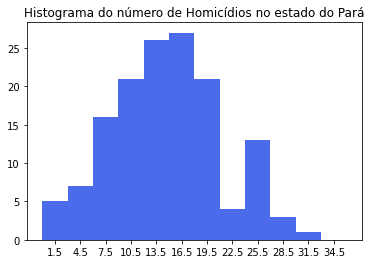

In [6]:
#plotagem do histograma
plt.bar(ponto_medio_p, [t for t in classes_p.values()], 3, color='#4B6BEA')
plt.title('Histograma do número de Homicídios no estado do Pará')
plt.xticks(ponto_medio_p)
plt.show()


In [7]:
#calcular o a quantidade da amostra "n"
n = (math.pow(1.96, 2)*math.pow(variancia_p, 2))/(sum(numeros) *
                                                0.05+math.pow(1.96, 2)*math.pow(variancia_p, 2)/sum(numeros))
n = math.ceil(n)



# Amostragem Aleatória Simples

In [8]:
with open('dados2.csv', 'r') as arquivo:
    ler = csv.reader(arquivo, delimiter=';')
    populacao = [entrada for entrada in ler]



In [9]:
#selecionando a amostra
random.seed(30)
amostra_aas = random.sample(populacao, 60)



In [10]:
#adicionando os dados da amostra em um dicionário para verificar quantas quais e quantas mesoregiões fazem parte da amostra
def cont_mesoreg(matriz_amostra):
    mesoregioes_selec = [item[2] for item in matriz_amostra]
    mesoreg = {
        'Baixo Amazonas': mesoregioes_selec.count('Baixo Amazonas'),
        'Marajo':mesoregioes_selec.count('Marajo'),
        'Metropolitana de Belem': mesoregioes_selec.count('Metropolitana de Belem'),
        'Nordeste Paraense': mesoregioes_selec.count('Nordeste Paraense'),
        'Sudoeste Paraense': mesoregioes_selec.count('Sudoeste Paraense'),
        'Sudeste Paraense': mesoregioes_selec.count('Sudeste Paraense'),
    }
    return mesoreg
mesoreg_selec_aas = cont_mesoreg(amostra_aas)



In [11]:
#coletando somente a lista de números da amostra juntamente as estatísticas básicas
numeros_aas = list(map(lambda x:float(x), [item[1] for item in amostra_aas]))

media_aas, variancia_aas, desv_padr_aas, cv_aas = estatisticas_basicas(numeros_aas)


In [12]:
#utilizando a função criada para desenvolver o dicionario com as classes e suas respectivas frequencias e uma lista com os pontos médios
classes_aas, ponto_medio_aas = listas_dict_classes(numeros_aas)



In [13]:
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_aas.items():
    print(f'{i:^13} | {j:>4}')

   Classes    |  Fi 
--------------|-----
 0.0|---4.0   |    1
 4.0|---8.0   |    8
 8.0|---12.0  |   12
12.0|---16.0  |   21
16.0|---20.0  |   11
20.0|---24.0  |    2
24.0|---28.0  |    5
28.0|---32.0  |    0


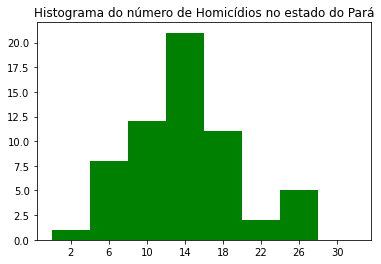

In [14]:
#plotagem do histograma
plt.bar(ponto_medio_aas, [t for t in classes_aas.values()],4, color='green')
plt.title('Histograma do número de Homicídios no estado do Pará')
plt.xticks(ponto_medio_aas)
plt.show()

# Amostragem Sistemática


In [15]:
#utilizando o arquivo .csv com os dados ordenados da menor taxa de homicio para a maior taxa.
with open('dados2_ordenado.csv', 'r') as arquivo:
    ler = csv.reader(arquivo, delimiter =';')
    populacao_ord = [item for item in ler]


In [16]:
#calculando o valor de K para verificar a distancia dos intervalos e deciasão do inicio da selação atarvés do r
k_as = round(len(populacao_ord)/n)
r = random.randint(1,k_as)
posicoes_amostras = [r]
for posicao in range(1,n):
    posicoes_amostras.append(r+posicao*k_as)


In [17]:
amostra_as =[]
for seletor in posicoes_amostras:
    amostra_as.append(populacao_ord[seletor])


In [18]:
mesoreg_select_as = cont_mesoreg(amostra_as)



In [19]:
#separando os valores numericos da matriz
numeros_as = list(map(lambda x:float(x),[item[1] for item in amostra_as]))
media_as, variancia_as, desv_padr_as, cv_as = estatisticas_basicas(numeros_as)


In [20]:
#criação do dicionário para armazenamento das classes e da lista de pontos médios
classes_as, ponto_medio_as = listas_dict_classes(numeros_as)


In [21]:
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_as.items():
    print(f'{i:^13} | {j:>4}')

   Classes    |  Fi 
--------------|-----
 0.0|---3.0   |    2
 3.0|---6.0   |    4
 6.0|---9.0   |    8
 9.0|---12.0  |   10
12.0|---15.0  |   13
15.0|---18.0  |   14
18.0|---21.0  |    9
21.0|---24.0  |    0


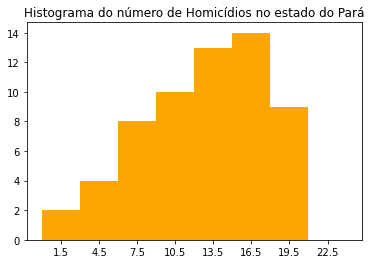

In [22]:
#plotagem do histograma
plt.bar(ponto_medio_as, [t for t in classes_as.values()],3, color='orange')
plt.title('Histograma do número de Homicídios no estado do Pará')
plt.xticks(ponto_medio_as)
plt.show()

# Amostragem Estratificada

In [23]:
#saparação dos grupos em mesoregião (Baixo Amazonas, Marajo, Metropolitana de Belem, Nordeste Paraense, Sudoeste Paraense, Sudeste Paraense)
def separar_blocos(matriz, nome_procurar, posicao):
    lista = [item for item in matriz if nome_procurar in item]
    return lista

meso_ba = separar_blocos(populacao, 'Baixo Amazonas', 2)
meso_m = separar_blocos(populacao, 'Marajo', 2)
meso_mb = separar_blocos(populacao, 'Metropolitana de Belem', 2)
meso_np = separar_blocos(populacao, 'Nordeste Paraense', 2)
meso_sudo_pa = separar_blocos(populacao, 'Sudoeste Paraense', 2)
meso_sudes_pa = separar_blocos(populacao, 'Sudeste Paraense', 2)


In [24]:
#extração de cada estrato para uma unica lista utilizando função
def extrair(matriz):
    lista_provisoria = random.sample(
        matriz, round((len(matriz)/len(populacao)*n)))
    return lista_provisoria


amostra_ae = extrair(meso_ba) + extrair(meso_m) + extrair(meso_mb) + \
    extrair(meso_np) + extrair(meso_sudo_pa) + extrair(meso_sudes_pa)


In [25]:
mesoreg_select_ae = cont_mesoreg(amostra_ae)


In [26]:
#separar os valores numericos da amostra e descrevendo estatisticas basicas sobre a amostra
numeros_ae = list(map(lambda x:float(x),[item[1] for item in amostra_ae]))
media_ae, variancia_ae, desv_padr_ae, cv_ae = estatisticas_basicas(numeros_ae)




In [27]:
#criação do dicionário para armazenamento das classes e da lista de pontos médios
classes_ae, ponto_medio_ae = listas_dict_classes(numeros_ae)


In [28]:
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_ae.items():
    print(f'{i:^13} | {j:>4}')

   Classes    |  Fi 
--------------|-----
 0.0|---4.0   |    3
 4.0|---8.0   |    6
 8.0|---12.0  |   15
12.0|---16.0  |   19
16.0|---20.0  |   11
20.0|---24.0  |    2
24.0|---28.0  |    3
28.0|---32.0  |    1


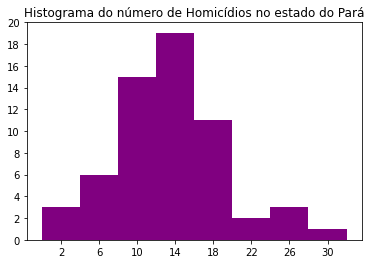

In [29]:
#plotagem do histograma
plt.bar(ponto_medio_ae, [t for t in classes_ae.values()],4, color='purple')
plt.title('Histograma do número de Homicídios no estado do Pará')
plt.xticks(ponto_medio_ae)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

a is {{n}}

In [30]:
plt.style.use("ggplot")

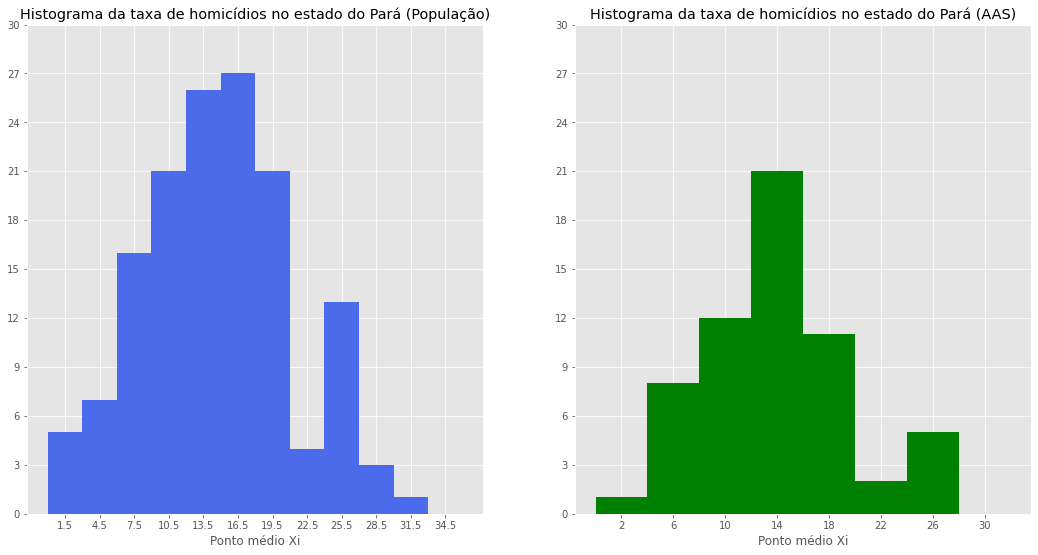

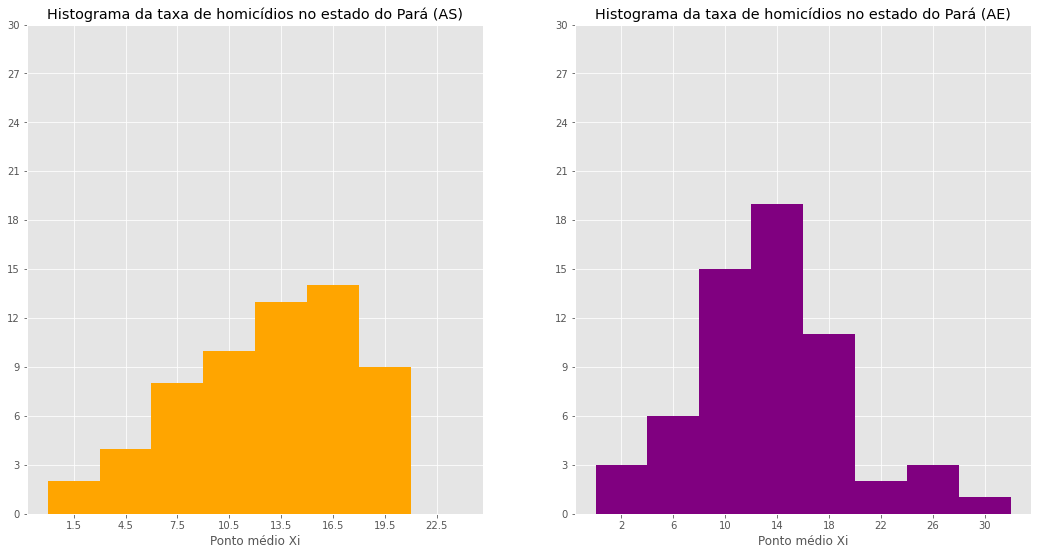

In [31]:
fig, (x1, x2) = plt.subplots(1, 2, figsize=(18,9))
fig2, (x3, x4) = plt.subplots(1, 2, figsize=(18,9))

x1.bar(ponto_medio_p, [t for t in classes_p.values()], 3, color='#4B6BEA')
x1.set(title = 'Histograma da taxa de homicídios no estado do Pará (População)',xlabel = 'Ponto médio Xi',xticks=ponto_medio_p, yticks=[0,3,6,9,12,15,18,21,24,27,30])
#x1.xticks(ponto_medio_as)

x2.bar(ponto_medio_aas, [t for t in classes_aas.values()],4, color='green')
x2.set(title = 'Histograma da taxa de homicídios no estado do Pará (AAS)',xlabel = 'Ponto médio Xi', xticks=ponto_medio_aas, yticks=[0,3,6,9,12,15,18,21,24,27,30])
#x2.xticks(ponto_medio_ae)
#x2.yticks([0,3,6,9,12,15,18,21,24,27,30,33])

x3.bar(ponto_medio_as, [t for t in classes_as.values()],3, color='orange')
x3.set(title = 'Histograma da taxa de homicídios no estado do Pará (AS)',xlabel = 'Ponto médio Xi', xticks=ponto_medio_as, yticks=[0,3,6,9,12,15,18,21,24,27,30])

x4.bar(ponto_medio_ae, [t for t in classes_ae.values()],4, color='purple')
x4.set(title = 'Histograma da taxa de homicídios no estado do Pará (AE)',xlabel = 'Ponto médio Xi', xticks=ponto_medio_ae, yticks=[0,3,6,9,12,15,18,21,24,27,30])

plt.show()